## Python statistics essential training - 03_08_email

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

### How I converted my mailbox.

In [ ]:
mbox = mailbox.mbox('Sent.mbox')

The resulting object is array-like, with one entry per message. Each entry is dictionary like, with keys corresponding to metadata and data for each message.

In [ ]:
mbox[0].keys()

The easiest way to get these data into Pandas is to build a CSV file from them. We use the module `csv` to write out the CSV file as we loop over the mailbox object. We save only subject, from, to, and date, and we write a simple header at the top with the names of columns.

In [ ]:
with open('mbox.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['subject','from','to','date'])
    
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['to'], message['date']])

All done! Thanks to Justin Ellis for inspiration with https://jellis18.github.io/post/2018-01-17-mail-analysis.

## Moving on!

In [25]:
messages = pd.read_csv('mbox-anonymized.csv')
messages

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <[]>,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"
...,...,...,...,...
1025,Walk begin around during seat affect within.,Michele Vallisneri <michele.vallisneri@jpl.nas...,<josephrodriguez@jimenez.net>,"Mon, 26 Mar 2018 10:40:36 -0700"
1026,Page paper gun course represent will.,Michele Vallisneri <michele.vallisneri@jpl.nas...,<hshaw@yahoo.com>,"Tue, 6 Mar 2018 21:44:22 -0800"
1027,Rate sing campaign wall similar seven staff pr...,Michele Vallisneri <michele.vallisneri@jpl.nas...,Dr. Donna Nguyen <emma32@aguirre.com>,"Tue, 23 Jan 2018 14:34:19 -0800"
1028,Education outside strong build time organizati...,Michele Vallisneri <michele.vallisneri@jpl.nas...,<charles67@gmail.com>,"Wed, 20 Dec 2017 08:28:47 -0800"


In [26]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  1030 non-null   object
 1   from     1029 non-null   object
 2   to       1030 non-null   object
 3   date     1030 non-null   object
dtypes: object(4)
memory usage: 32.3+ KB


In [27]:
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [29]:
re.search('<(.+)>', messages['from'][0]).group(0)

'<Michele.Vallisneri@jpl.nasa.gov>'

In [30]:
re.search ('<(.+)>', messages['from'] [0]).group(1)

'Michele.Vallisneri@jpl.nasa.gov'

In [31]:
def clean_email_address(email):
    match = re.search('<(.+)>', email)
    
    if match is None:
        return email.group(0)
    else:
        return match.group(1)

In [32]:
messages['from'] = messages['from'].dropna().apply(clean_email_address)

In [33]:
messages


,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,"""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,[],"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,"""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"
...,...,...,...,...
1025,Walk begin around during seat affect within.,michele.vallisneri@jpl.nasa.gov,<josephrodriguez@jimenez.net>,"Mon, 26 Mar 2018 10:40:36 -0700"
1026,Page paper gun course represent will.,michele.vallisneri@jpl.nasa.gov,<hshaw@yahoo.com>,"Tue, 6 Mar 2018 21:44:22 -0800"
1027,Rate sing campaign wall similar seven staff pr...,michele.vallisneri@jpl.nasa.gov,Dr. Donna Nguyen <emma32@aguirre.com>,"Tue, 23 Jan 2018 14:34:19 -0800"
1028,Education outside strong build time organizati...,michele.vallisneri@jpl.nasa.gov,<charles67@gmail.com>,"Wed, 20 Dec 2017 08:28:47 -0800"


In [34]:
messages['date'][0]

'Mon, 27 Nov 2017 14:18:46 -0800'

In [35]:
pd.to_datetime(messages['date'][0])

Timestamp('2017-11-27 14:18:46-0800', tz='pytz.FixedOffset(-480)')

In [36]:
pd.to_datetime(messages['date'][0]).tz_convert('UTC')

Timestamp('2017-11-27 22:18:46+0000', tz='UTC')

In [37]:
pd.to_datetime(messages['date'][0]).tz_convert('America/Denver')

Timestamp('2017-11-27 15:18:46-0700', tz='America/Denver')

In [38]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('America/Denver'))

In [39]:
messages['date'].min(), messages['date'].max()

(Timestamp('2017-07-01 00:26:52-0600', tz='America/Denver'),
 Timestamp('2018-05-13 09:40:20-0600', tz='America/Denver'))

In [54]:
messages['date'].dt.day_name

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7fdd7d0b18d0>>

In [53]:
messages['dayofweek'] = pd.Categorical(messages['date'].dt.day_name,
                                       ordered = True,
                                       categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
                                      )

ValueError: Length of values (1) does not match length of index (1030)

<AxesSubplot:xlabel='nyear', ylabel='timeofday'>

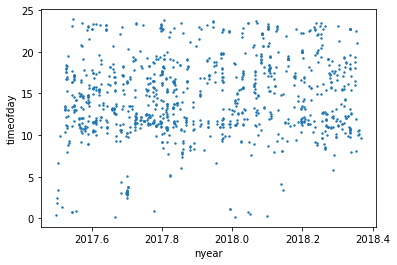

In [70]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
messages['weekday'] = messages['date'].dt.dayofweek.map(dayOfWeek)
messages['timeofday'] = messages['date'].dt.hour + messages['date'].dt.minute/60
messages['nyear'] = messages['date'].dt.year + messages['date'].dt.dayofyear/365 +  messages['timeofday']/24/365
messages.plot.scatter('nyear', 'timeofday', s = 2)

<AxesSubplot:xlabel='nyear', ylabel='timeofday'>

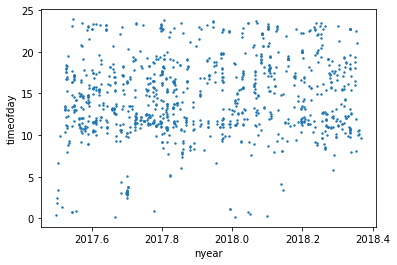

In [71]:
messages.plot.scatter('nyear', 'timeofday', s = 2)

<AxesSubplot:>

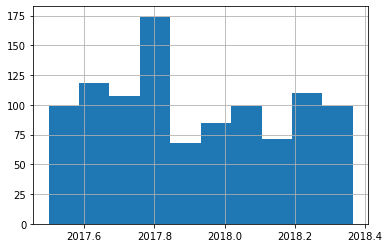

In [72]:
messages['nyear'].hist()

<AxesSubplot:>

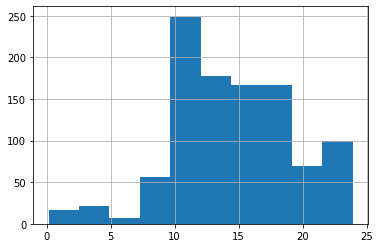

In [73]:
messages['timeofday'].hist()

<AxesSubplot:>

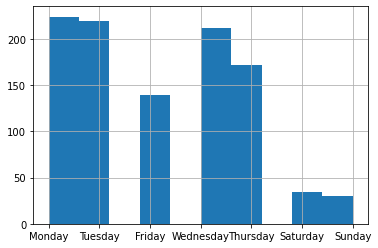

In [74]:
messages['weekday'].hist()

<AxesSubplot:>

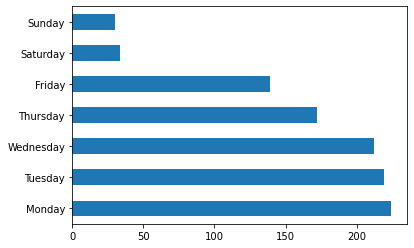

In [80]:
messages['weekday'].value_counts(sort = True).plot(kind = 'barh')